# Simple Examples for Using IGMspec (v1.1)

In [1]:
%matplotlib inline

In [2]:
# import
from igmspec import query_catalog as iqcat
from igmspec import interface_db as igidb
from igmspec import db_utils as idbu

from pyigm.surveys.llssurvey import LLSSurvey

## Setup catalog

In [3]:
reload(iqcat)
qcat = iqcat.QueryCatalog()

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the catalog file


In [4]:
qcat

<QueryCatalog:  DB_file=/u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 with 377018 sources
   Loaded surveys are [u'BOSS_DR12', u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7'] 
>

## Setup DB

In [5]:
reload(igidb)
idb = igidb.InterfaceDB()

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7']


In [6]:
idb

<InterfaceDB:  DB_file=/u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 
   Loaded surveys are [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7'] 
>

## Radial search

### Search around FJ0812+32

In [7]:
ids0812 = qcat.radial_search(('08:12:40.68','+32:08:09'), 1.*u.arcsec)
qcat.show_cat(ids0812)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
 50734 123.1695  32.1357  2.698           7   0.000 BOSS_PCA
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2


In [18]:
# Grab meta
reload(igidb)
idb = igidb.InterfaceDB()
#meta0812 = idb.grab_meta('KODIAQ_DR1', ids0812, show=True)
meta0812 = idb.grab_meta('SDSS_DR7', ids0812, show=True)

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7']
IGM_ID    RA     DEC    zem            SPEC_FILE            sig_zem  ... EPOCH  NPIX WV_MIN WV_MAX   R    SURVEY_ID
------ ------- ------- ------ ---------------------------- --------- ... ------ ---- ------ ------ ------ ---------
 50734 123.170  32.136  2.704 spSpec-52318-0861-333.fit.gz 0.0015619 ... 2000.0 3852 3799.3 9221.5 2000.0      9317


In [19]:
meta0812

zem,sig_zem,Z_CONF,Z_WARN,PLATE,MJD,FIBERID,FLG_TARG,RA,DEC,PSF_U,PSF_G,PSF_R,PSF_I,PSF_Z,PSF_SU,PSF_SG,PSF_SR,PSF_SI,PSF_SZ,DATE-OBS,IGM_ID,EPOCH,SPEC_FILE,NPIX,WV_MIN,WV_MAX,R,SURVEY_ID
float32,float32,float32,int16,int32,int32,int32,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str11,int64,float64,str28,int64,float64,float64,float64,int64
2.704,0.0015619,0.0,0,861,52318,333,0,123.170,32.136,19.6334,17.8486,17.4545,17.2825,17.139,0.02811,0.017889,0.021285,0.018897,0.028298,2002-Feb-13,50734,2000.0,spSpec-52318-0861-333.fit.gz,3852,3799.3,9221.5,2000.0,9317


In [20]:
# Grab spectra
J2334spec = idb.grab_spec('SDSS_DR7', ids0812)

Staged 1 spectra totalling 6.4e-05 Gb
Loaded spectra


TypeError: __init__() got an unexpected keyword argument 'mask_edges'

### Search around J233446.40-090812.3

In [10]:
ids2334 = qcat.radial_search('J233446.40-090812.3', 1.*u.arcsec)
qcat.show_cat(ids2334)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
297371 353.6933  -9.1367  3.317          12   0.000   SIMBAD
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4


In [11]:
# Grab meta
meta2334 = idb.grab_meta('HD-LLS_DR1', ids2334, show=True)

IGM_ID    RA     DEC    zem                 SPEC_FILE               ...   DATE-OBS  WV_MIN  WV_MAX    R    SURVEY_ID
------ ------- ------- ------ ------------------------------------- ... ----------- ------ ------- ------- ---------
297371 353.693  -9.137  3.317   HD-LLS_J233446.40-090812.3_ESI.fits ... 2002-Dec-02 3899.8 11714.9  6000.0       140
297371 353.693  -9.137  3.317 HD-LLS_J233446.40-090812.3_HIRES.fits ... 2007-Sep-18 4064.6  7120.0 48000.0       141
297371 353.693  -9.137  3.317  HD-LLS_J233446.40-090812.3_MAGE.fits ... 2016-Jul-17 3042.1 10269.6  5000.0       142


In [12]:
meta2334

Name,QSO,RA,DEC,zem,Z_LLS,logNHI,sig(logNHI) [2],SPEC_FILE,IGM_ID,EPOCH,NPIX,DATE-OBS,WV_MIN,WV_MAX,R,SURVEY_ID
str33,str19,float64,float64,float64,float64,float64,float64,str37,int64,float64,int64,str11,float64,float64,float64,int64
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_ESI.fits,297371,2000.0,33000,2002-Dec-02,3899.8,11714.9,6000.0,140
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_HIRES.fits,297371,2000.0,129277,2007-Sep-18,4064.6,7120.0,48000.0,141
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_MAGE.fits,297371,2000.0,16580,2016-Jul-17,3042.1,10269.6,5000.0,142


In [13]:
# Grab spectra
J2334spec = idb.grab_spec('HD-LLS_DR1', ids2334)

Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:211: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


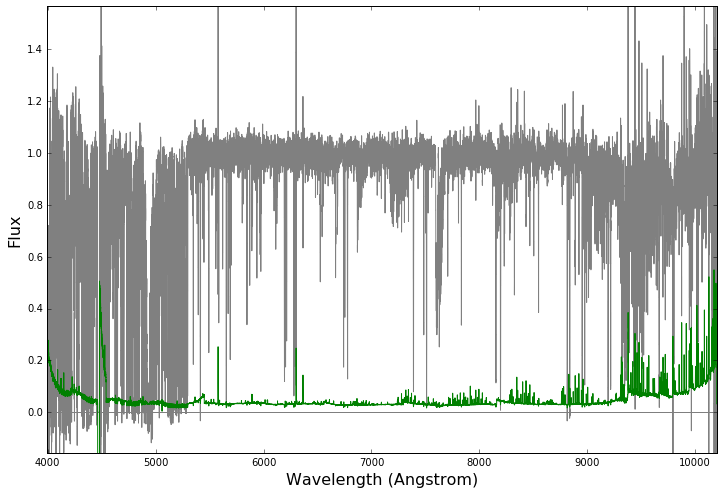

In [14]:
# Plot the first one (ESI)
J2334spec.plot(inline=True)

----

## Simple catalog search

### LLS from SDSS_DR7 vs. IGMspec

In [15]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [16]:
# Grab the coord
lls_coord = sdss_dr7_all.coord
lls_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(339.61320833, 13.90905556), (160.36441667, 2.65569444),
     (167.247, 3.19108333), ..., (230.02470833, 23.66472222),
     (124.528625, 7.32227778), (150.86345833, 22.97005556)]>

In [17]:
# Match
lls_ids = qcat.match_coord(lls_coord)

Your search yielded 1669 matches


In [18]:
# Show cat
qcat.show_cat(lls_ids)

IGM_ID    RA     DEC    zem   flag_survey sig_zem flag_zem
------ ------- ------- ------ ----------- ------- --------
   881   0.751  16.008  3.662           1   0.002 BOSS_PCA
   897   0.764 -10.864  3.638           1   0.001 BOSS_PCA
  1680   1.402  13.997  3.709           1   0.002 BOSS_PCA
  2168   1.878  16.126  3.519           1   0.002 BOSS_PCA
  3248   2.813  14.767  4.986          17   0.003 BOSS_PCA
  5192   4.558  14.415  4.216           1   0.001 BOSS_PCA
  5225   4.586  14.314  3.938           1   0.004 BOSS_PCA
  5482   4.827  15.103  4.145           1   0.003 BOSS_PCA
  5617   4.959  -0.678  4.319           1   0.010 BOSS_PCA
  5987   5.334  15.857  3.690           1   0.001 BOSS_PCA
   ...     ...     ...    ...         ...     ...      ...
297388  56.012  -6.883  3.957           8   0.000     UNKN
297397 167.536   2.749  4.149           8   0.000     UNKN
297402 210.700   1.776  4.187           8   0.000     UNKN
297416  52.832  -7.695  4.734          16   0.010      G

In [22]:
# Grab HD-LLS spec
LLSspec = idb.grab_spec('GGG', lls_ids)

Staged 172 spectra totalling 0.0044032 Gb
Loaded spectra


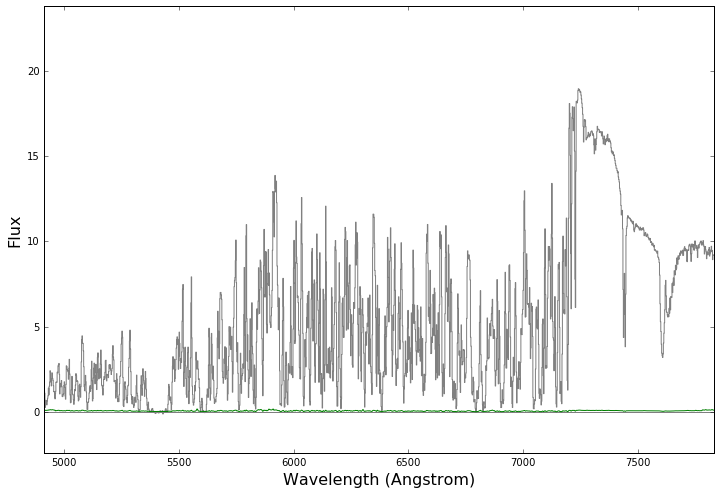

In [23]:
# Show the first spectrum
LLSspec.plot(inline=True)

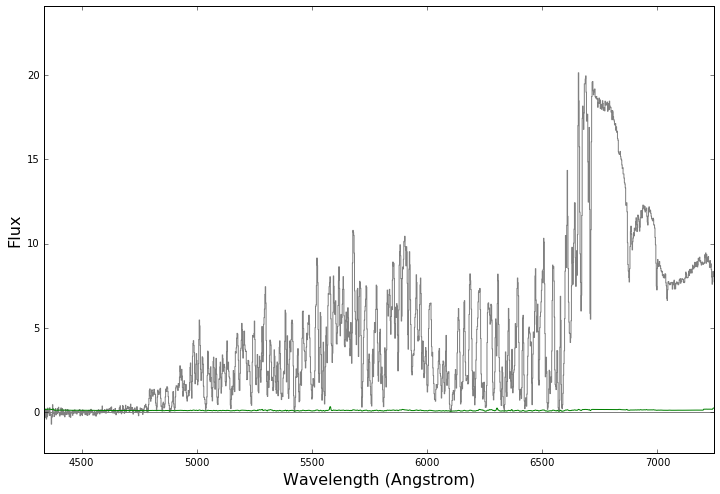

In [24]:
# Show the 10th spectrum
LLSspec.select=9
LLSspec.plot(inline=True)

----

## Time Evolution

In [15]:
ggg_kodiaq = qcat.cat['flag_survey'] == 20

In [16]:
ids_time = qcat.cat['IGM_ID'][ggg_kodiaq]
qcat.show_cat(ids_time)

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
297305  10.2277  -9.2574  4.976          20   0.000   SIMBAD
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4


In [17]:
reload(igidb)
idb = igidb.InterfaceDB()
meta = idb.grab_meta(['GGG','KODIAQ_DR1'], ids_time)

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1']
IGM_ID    RA     DEC    zem            SPEC_FILE                SDSSJ        ... NPIX WV_MIN  WV_MAX   R   SURVEY_ID
------ ------- ------- ------ --------------------------- ------------------ ... ---- ------ ------- ----- ---------
297305  10.228  -9.257  4.980 SDSSJ0040-0915_R400.fits.gz 004054.65-091526.8 ... 1554 6472.0 10714.8 833.0         2
297305  10.228  -9.257  4.980 SDSSJ0040-0915_B600.fits.gz 004054.65-091526.8 ... 1580 4947.1  7871.0 940.0         3
IGM_ID    RA     DEC    zem         SPEC_FILE            qso       ... EPOCH   NPIX  WV_MIN WV_MAX    R    SURVEY_ID
------ ------- ------- ------ --------------------- -------------- ... ------ ------ ------ ------ ------- ---------
297305  10.228  -9.257  4.976 J004054-091526_f.fits J004054-091526 ... 2000.0 104269 5453.0 8570.3 48000.0         5


In [18]:
spec_time = idb.grab_spec(['GGG','KODIAQ_DR1'], ids_time)

Staged 2 spectra totalling 5.12e-05 Gb
Loaded spectra
Staged 1 spectra totalling 0.0032 Gb
Loaded spectra


In [19]:
spec_time

[<XSpectrum1D: file=none, wvmin=4336.29 Angstrom, wvmax=7243.62 Angstrom>,
 <XSpectrum1D: file=none, wvmin=5453 Angstrom, wvmax=8570.33 Angstrom>]

### Plot both

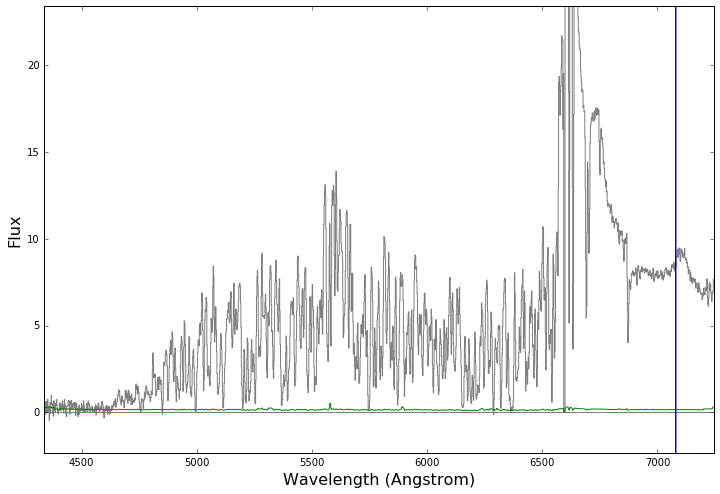

In [20]:
spec_time[0].plot(plot_two=spec_time[1],inline=True)

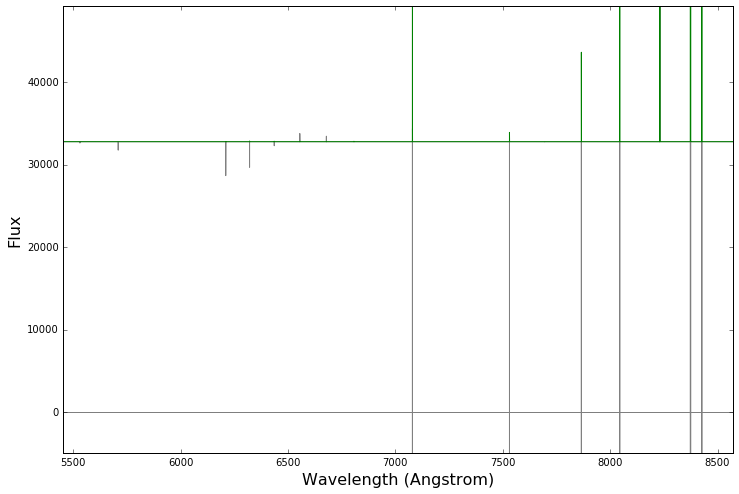

In [22]:
spec_time[1].plot(inline=True)
# DANG KODIAQ crap

----

## Pairs

### QPQ8 like

#### Query on separation (angular and redshift)

In [93]:
reload(iqcat)
qcat = iqcat.QueryCatalog()
ID_fg, ID_bg = qcat.pairs(30*u.arcsec, 3000.*u.km/u.s)

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the catalog file


In [94]:
qcat.show_cat(ID_fg)

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
   293   0.2461  28.3758  0.985           1  -1.000 BOSS_PCA
   434   0.3669   8.6782  2.794           1   0.003 BOSS_PCA
   851   0.7280  21.6517  1.877           1  -1.000 BOSS_PCA
  1006   0.8555  13.4381  0.628           1  -1.000 BOSS_PCA
  1638   1.3680  25.7650  2.545           1  -1.000 BOSS_PCA
  2491   2.1692  17.1640  1.380           1  -1.000 BOSS_PCA
  2749   2.3791  17.4591  0.665           1  -1.000 BOSS_PCA
  2831   2.4458  12.0703  2.254           1   0.002 BOSS_PCA
  2873   2.4857  26.2747  1.997           1   0.001 BOSS_PCA
  2941   2.5424  32.9975  2.043           1  -1.000 BOSS_PCA
   ...      ...      ...    ...         ...     ...      ...
295491 358.4204  30.5624  0.665           1   0.001 BOSS_PCA
295852 358.7718  32.0164  1.813           1   0.001 BOSS_PCA
296361 359.2031  19.6677  1.096           1  -1.000 BOSS_PCA
296404 359.2356  16.6031

#### Check for high dispersion spectrum in b/g QSOs

In [95]:
highdisp = qcat.cut_on_surveys(['HD-LLS_DR1', 'KODIAQ_DR1'], ID_bg)

In [97]:
qcat.show_cat(ID_bg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
297316  36.4785   0.9144  2.975           4   0.000   SIMBAD
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4


In [106]:
qcat.show_cat(ID_fg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
 35491  36.4786   0.9213  1.770           1   0.000 BOSS_PCA
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4


In [105]:
qcat.coords[qcat.cat['IGM_ID']==297316].ra.to_string(unit=u.hour),qcat.coords[qcat.cat['IGM_ID']==297316].dec.to_string(unit=u.deg)

(array([u'2h25m54.85s'], 
       dtype='<U11'), array([u'0d54m51.9s'], 
       dtype='<U10'))

In [101]:
# QPQ3?? (only 1 member of the pair)
qcat.radial_search('J120416.68+022110.9', 30*u.arcsec)

Your search yielded 1 match[es]


154088
